## Problem Statement:

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:


### Lead Conversion Process - Demonstrated as a funnel
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

### Data:

1. You have been provided with a leads dataset from the past with around 9000 data points.

2. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. 

3. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. 

4. Another thing that you also need to check out for are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

 

## Goals of the Case Study
There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.
 

## Results Expected

1. A well-commented Jupyter note with at least the logistic regression model, the conversion predictions and evaluation metrics.

2. The word document filled with solutions to all the problems.

3. The overall approach of the analysis in a presentation

a. Mention the problem statement and the analysis approach briefly 
b. Explain the results in business terms
c. Include visualisations and summarise the most important results in the presentation

4. A brief summary report in 500 words explaining how you proceeded with the assignment and the learnings that you gathered.
 

You need to submit the following four components:

1. Python commented file: Should include detailed comments and should not contain unnecessary pieces of code.

2. Word File: Answer all the questions asked by the company in the word document provided.

3. Presentation:  Make a presentation to present your analysis to the chief data scientist of your company (and thus you should include both technical and business aspects). The presentation should be concise, clear, and to the point. Submit the presentation after converting it into PDF format.

4. PDF File: Write the summary report in a word file and submit it as a PDF.

### Approach - Major Steps
 - Data Exploration
         - Import data
         - Shape
         - data types
         - Null values count
         
 - Data Cleaning
         - Remove unnecessary columns
         - Impute null values
         - Outlier analysis
         - Check corealtions
     
 - Data Modeling
         - Split to train and test data
         - Feature selection using RFE
         - First itreation of Logistic Regression model
         - Calculate vif and check for multi colinearity
         - Drop cols where p value is more than 0.05
         - Once the model is finalised, use .predict() to calculate the probabilities for the train dataset and the test dataset
         - Use confusion matrix to calculate accuracy, sensitivity and specificity

         

In [1]:
# importing lib-package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# model  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


# Data display limit
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)


### Data Exploration

### 1. Reading and Understanding the data:

In [2]:
#Importing Leads.csv
data = pd.read_csv('data/Leads.csv')

In [3]:
# Have a look on data top 5 rows
data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit            Last Activity  \
0                            0                   0.0  Page Visited on Website   
1                          674                   2.5             Email Opened   
2                         1532                   2.0             Email Opened   
3                          305                   1.0              Unreachable   
4                         1428                   1.0        Converted to Lead   

  Country           Specialization How did you hear about X Education  \
0     NaN                   Select                             Select   
1   India                   Select                             Select   
2   India  Business Administration                             Select   
3   India    Media and Advertising                      Word Of Mouth   
4   India                   Select                              Other   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing               NaN   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    Lead Profile  \
0                                No                        No          Select   
1                                No                        No          Select   
2                                No                        No  Potential Lead   
3                            

In [4]:
data.describe()

Lead Number    Converted  TotalVisits  Total Time Spent on Website  \
count    9240.000000  9240.000000  9103.000000                  9240.000000   
mean   617188.435606     0.385390     3.445238                   487.698268   
std     23405.995698     0.486714     4.854853                   548.021466   
min    579533.000000     0.000000     0.000000                     0.000000   
25%    596484.500000     0.000000     1.000000                    12.000000   
50%    615479.000000     0.000000     3.000000                   248.000000   
75%    637387.250000     1.000000     5.000000                   936.000000   
max    660737.000000     1.000000   251.000000                  2272.000000   

       Page Views Per Visit  Asymmetrique Activity Score  \
count           9103.000000                  5022.000000   
mean               2.362820                    14.306252   
std                2.161418                     1.386694   
min                0.000000                     7.000000   
25%                1.000000                    14.000000   
50%                2.000000                    14.000000   
75%                3.000000                    15.000000   
max               55.000000                    18.000000   

       Asymmetrique Profile Score  
count                 5022.000000  
mean                    16.344883  
std                      1.811395  
min                     11.000000  
25%                     15.000000  
50%                     16.000000  
75%                     18.000000  
max                     20.000000

In [5]:
# check data types of cols
data.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [6]:
data.shape

(9240, 37)

So here we have 

9240 rows,
37 columns

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [8]:
# Here Prospect_Id is unique id 
# Let's check for duplicate records

sum(data.duplicated(subset = 'Prospect ID')) == 0

True

Observations:: there is no duplicate rows present in dataset.

In [9]:
#LeadNumber :: A lead number assigned to each lead procured.
# Let's check for duplicate records for leadNumber

sum(data.duplicated(subset = 'Lead Number')) == 0

True

Observations:: there is no duplicate entry for Lead Number present in dataset.

#### Null values count

In [10]:
#checking null values in each rows

data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
#checking percentage of null values in each column

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

#### Here we can see some cols have value as Select that is also a null value so add that.



In [12]:
#Converting 'Select' values to NaN.

data = data.replace('Select', np.nan)
# Check again null value count
data.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [13]:
#checking percentage of null values in each column
round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

### 2. Data Preparation:

### Data - Cleaning

#### Remove un-necessary cols 

Here below cols have more than 70% null values so remove them

 - How did you hear about X Education               78.46
 - Lead Profile                                     74.19
 
 So here we can drop cols that have more than 70% null values

In [14]:
#dropping cols with more than 70% missing values

cols=data.columns

for i in cols:
    if((100*(data[i].isnull().sum()/len(data.index))) >= 70):
        data.drop(i, 1, inplace = True)

In [15]:
#checking null values percentage

round(100*(data.isnull().sum()/len(data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [16]:
#dropping Lead Number and Prospect ID since they have all unique values

data.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

### 3. Treat the Null Data & Data Analysis:
### Categorical Analysis

In [17]:
#plotting spread of Country columnn 
def countPlot(feature,hueVal,figSize):
    plt.figure(figsize=figSize)
    s1=sns.countplot(feature, hue=hueVal)
    s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
    plt.show()
    
# Funtion to check value_counts and countPlot
def checkValueCount(feature,figSize=(15,5)):
    #checking value counts of feature column
    print(data[feature].value_counts(dropna=False))
    countPlot(data[feature],data.Converted,figSize)    

In [18]:
colsToBeDrop = []

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64


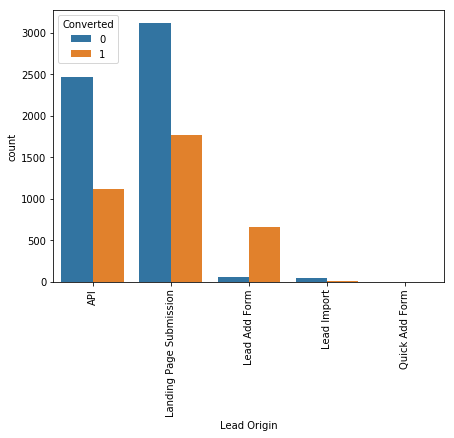

In [19]:
checkValueCount('Lead Origin',figSize=(7,5))

#### Inferences:
 - Landing page submission and API has been 1 converted rate. The not converted rate is also high in both.
 - Lead Import and Quick Add form have very few records and less conversion rate.  

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
welearnblog_Home        1
blog                    1
NC_EDM                  1
testone                 1
youtubechannel          1
Pay per Click Ads       1
Name: Lead Source, dtype: int64


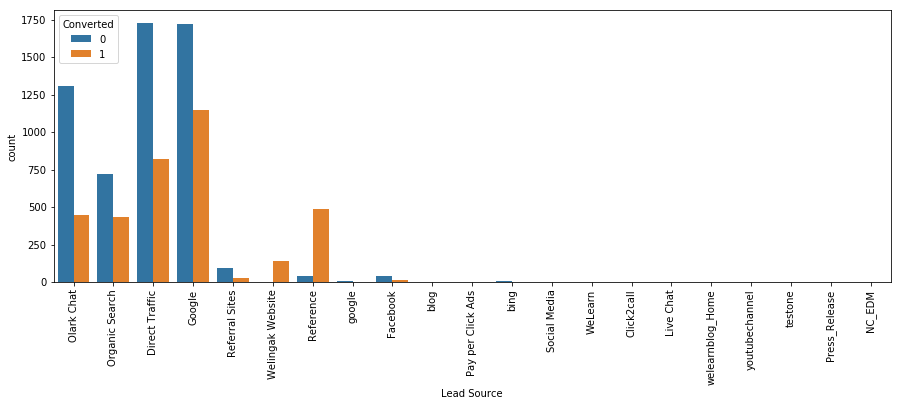

In [20]:
checkValueCount('Lead Source',figSize=(15,5))

#### Inferences :: 
 - There are different entry for Google & google so let's merge them
 - Let's merge fewer entry to 'Others'

In [21]:
#replacing Nan Values and combining low frequency values
data['Lead Source'] = data['Lead Source'].replace(np.nan,'Others')
data['Lead Source'] = data['Lead Source'].replace('google','Google')
data['Lead Source'] = data['Lead Source'].replace('Facebook','Social Media')
data['Lead Source'] = data['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others') 

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          57
Others                55
Live Chat              2
Name: Lead Source, dtype: int64


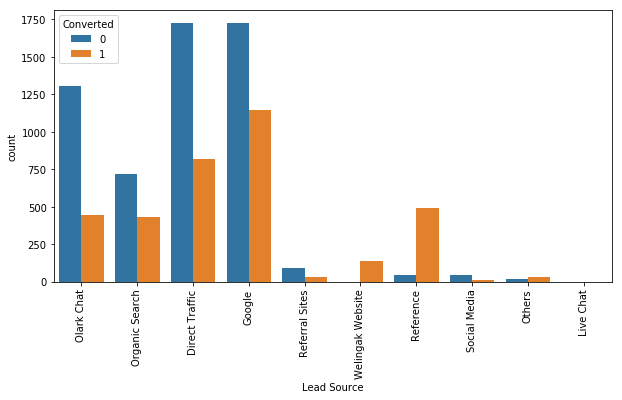

In [22]:
checkValueCount('Lead Source',figSize=(10,5))

#### Inferences :: 

- To Improve conversion rate focus more on below fields 
    - Olark Chat
    - Organic Search
    - Direcrt Traffic
    - Google
    - Welingak Websites
    - Reference

No     8506
Yes     734
Name: Do Not Email, dtype: int64


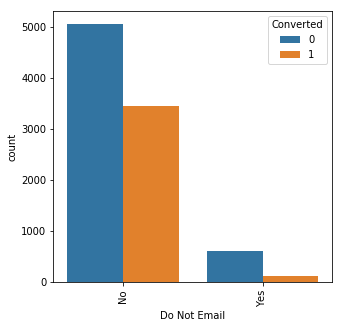

In [23]:
checkValueCount('Do Not Email',figSize=(5,5))

No     9238
Yes       2
Name: Do Not Call, dtype: int64


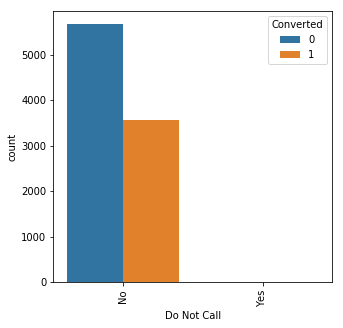

In [24]:
checkValueCount('Do Not Call',figSize=(5,5))

#### Inferences :: 
 For Do Not Email major values are no and for Do Not call almost values are no so let's drop Do Not Call cols


In [25]:
colsToBeDrop.extend(['Do Not Call'])

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64


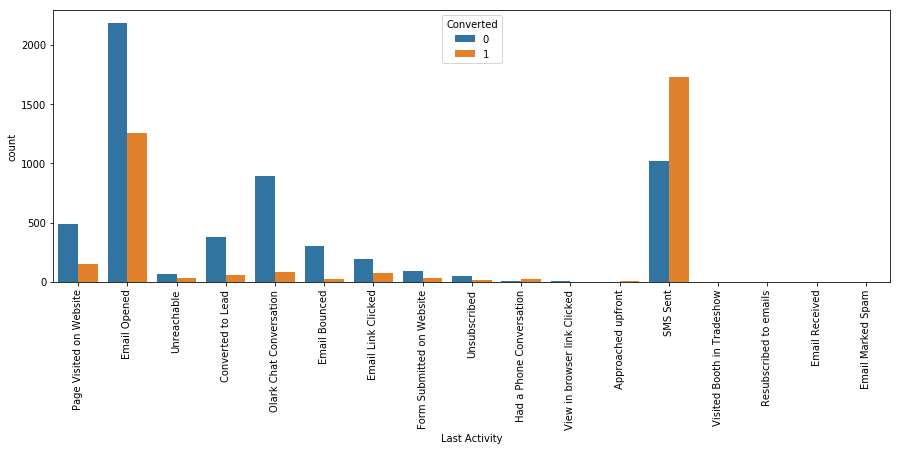

In [26]:
checkValueCount('Last Activity')

In [27]:
#replacing Nan Values and combining low frequency values

data['Last Activity'] = data['Last Activity'].replace(np.nan,'Others')
data['Last Activity'] = data['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64


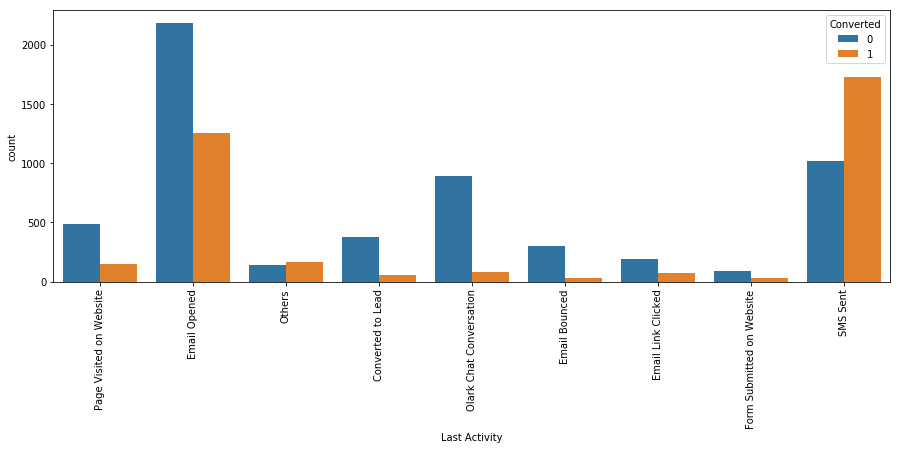

In [28]:
checkValueCount('Last Activity')

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
France                     6
Oman                       6
unknown                    5
Nigeria                    4
Germany                    4
South Africa               4
Kuwait                     4
Canada                     4
Sweden                     3
Netherlands                2
Asia/Pacific Region        2
Bangladesh                 2
Ghana                      2
Belgium                    2
China                      2
Uganda                     2
Italy                      2
Philippines                2
Malaysia                   1
Vietnam                    1
Switzerland                1
Kenya                      1
Liberia                    1
Tanzania      

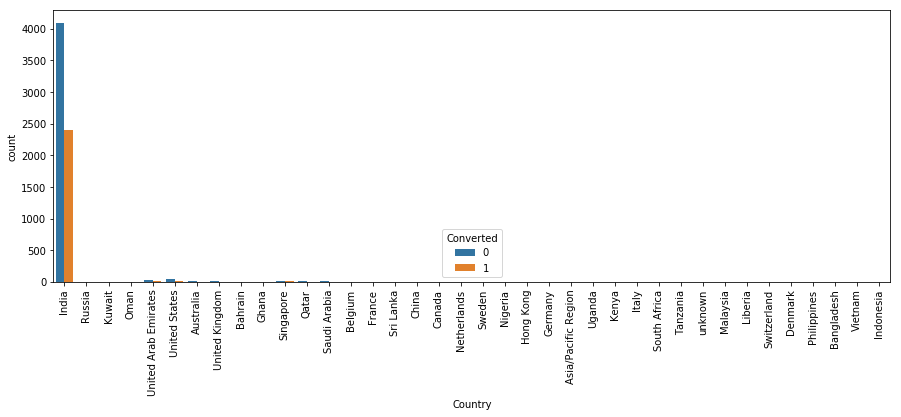

In [29]:
checkValueCount('Country')

#### Observation :: Here we can see that there is only single value in country col so we can drop country column.

In [30]:
colsToBeDrop.append('Country')

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


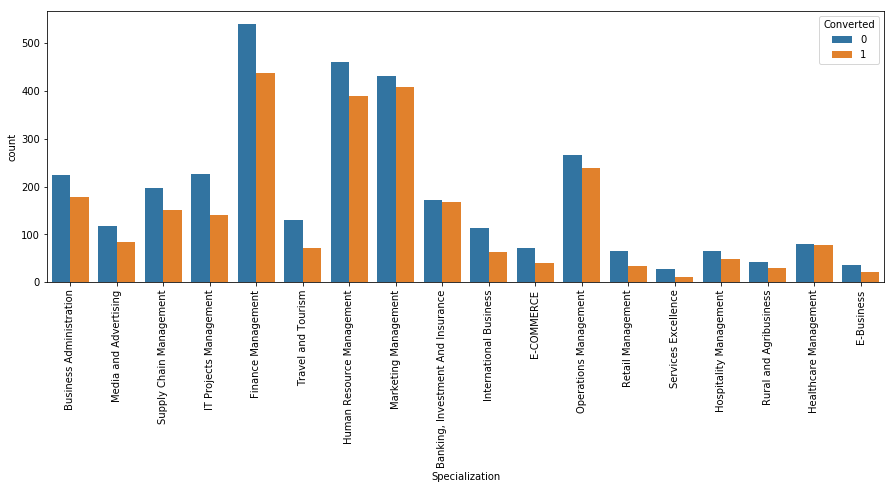

In [31]:
checkValueCount('Specialization')

#### Inferences :: 
Here we can see that there are 3380 null value in Specialization col so we need to treat null value for this.

In [32]:
# Treat null value for Specialization here.
data['Specialization'] = data['Specialization'].replace(np.nan, 'Not Specified')

#### Here we can see there are different category of secialization of Management stream is defined we can combined them for better analysis
So let's comnined below streams to Management 
 - 'Finance Management'
 - 'Human Resource Management'
 - 'Marketing Management'
 - 'Operations Management'
 - 'IT Projects Management'
 - 'Supply Chain Management'
 - 'Healthcare Management'
 - 'Hospitality Management'
 - 'Retail Management'



In [33]:
#combining Management Specializations because they show similar trends

data['Specialization'] = data['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations') 

Management_Specializations           4253
Not Specified                        3380
Business Administration               403
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
E-COMMERCE                            112
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64


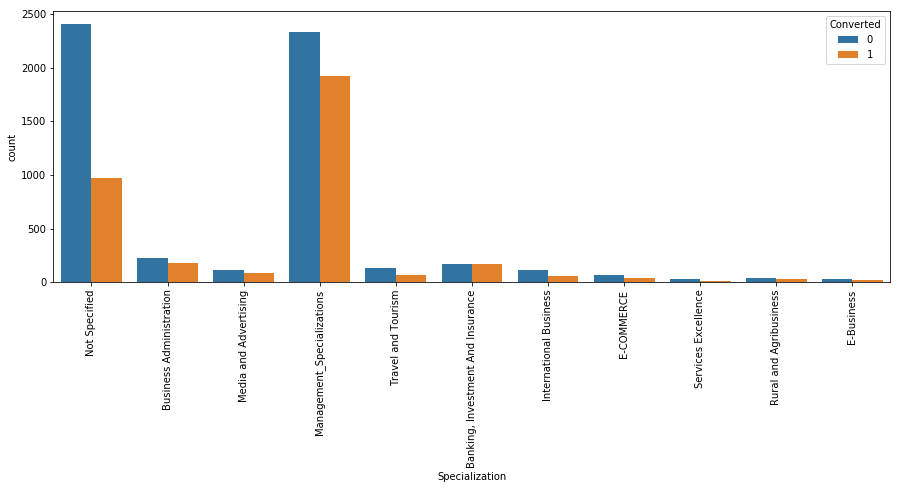

In [34]:
checkValueCount('Specialization')

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


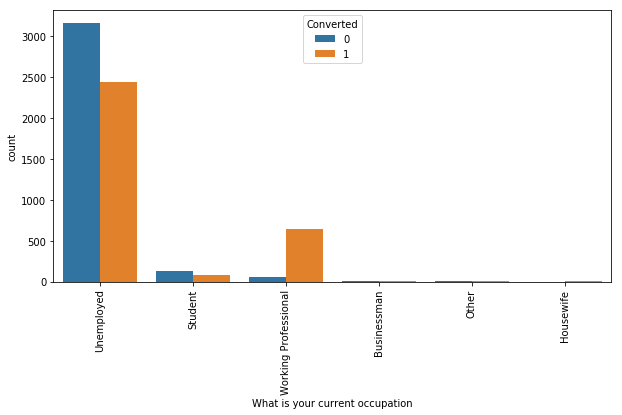

In [35]:
checkValueCount('What is your current occupation',figSize=(10,5))

#### Inferences :: 
Here we can see that there are 2690 null value in this col so we need to treat null value for this. We can replace null value with unemployed value

In [36]:
# Treat null value for occupation :: replace with unemployed.
col_name = 'What is your current occupation'

data[col_name] = data[col_name].replace(np.nan, 'Unemployed')

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64


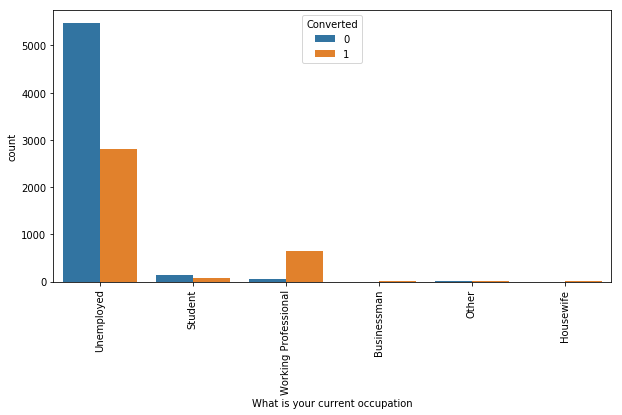

In [37]:
checkValueCount('What is your current occupation',figSize=(10,5))

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64


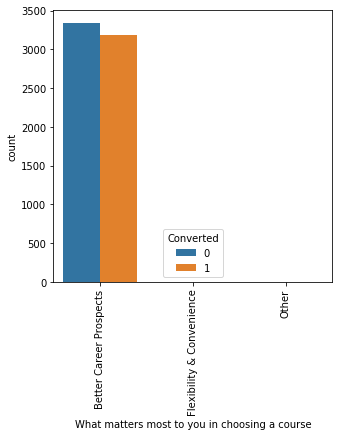

In [38]:
checkValueCount('What matters most to you in choosing a course',figSize=(5,5))

#### Inferences :: 
Here 2709 values are null for this cols so we can treat them as 'Others'


In [39]:
# Treat null value for What matters most to you in choosing a course :: replace with Other.
col_name = 'What matters most to you in choosing a course'

data[col_name] = data[col_name].replace(np.nan, 'Other')

Better Career Prospects      6528
Other                        2710
Flexibility & Convenience       2
Name: What matters most to you in choosing a course, dtype: int64


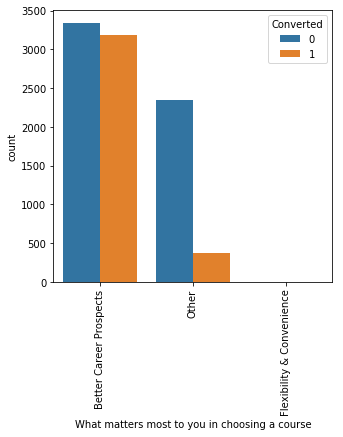

In [40]:
checkValueCount('What matters most to you in choosing a course',figSize=(5,5))

No     9226
Yes      14
Name: Search, dtype: int64


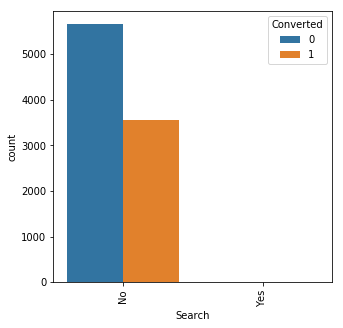

In [41]:
checkValueCount('Search',figSize=(5,5))

#### Inferences ::  we can drop search cols

In [42]:
colsToBeDrop.append('Search')

No    9240
Name: Magazine, dtype: int64


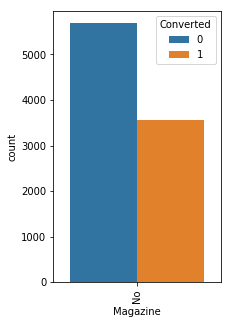

In [43]:
checkValueCount('Magazine',figSize=(3,5))

#### Inferences ::  
we can drop Magazine cols as there is only single value

In [44]:
colsToBeDrop.append('Magazine')

No     9238
Yes       2
Name: Newspaper Article, dtype: int64


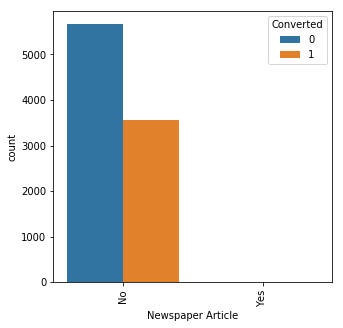

In [45]:
checkValueCount('Newspaper Article',figSize=(5,5))

#### Inferences ::  
we can drop Newspaper Article cols as there is almost single value

In [46]:
colsToBeDrop.append('Newspaper Article')

No     9239
Yes       1
Name: X Education Forums, dtype: int64


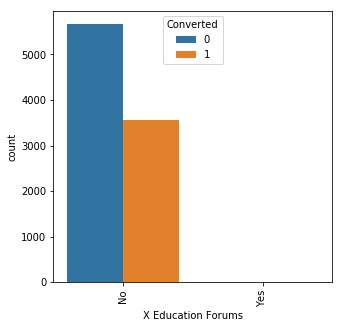

In [47]:

checkValueCount('X Education Forums',figSize=(5,5))

#### Inferences ::  
we can drop X Education Forum  cols as there is almost single value

In [48]:
colsToBeDrop.append('X Education Forums')

No     9239
Yes       1
Name: Newspaper, dtype: int64


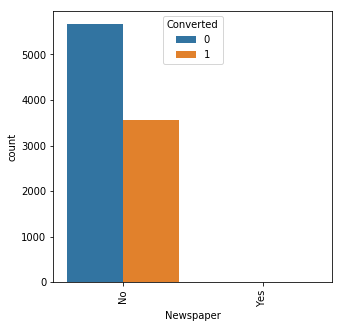

In [49]:
checkValueCount('Newspaper',figSize=(5,5))

#### Inferences ::  
we can drop Newspaper cols as there is almost single value

In [50]:
colsToBeDrop.append('Newspaper')

No     9236
Yes       4
Name: Digital Advertisement, dtype: int64


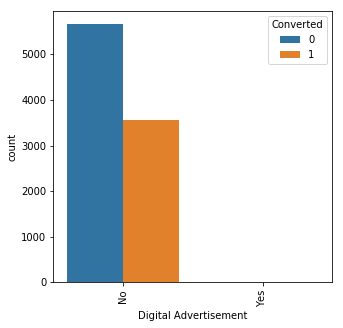

In [51]:
checkValueCount('Digital Advertisement',figSize=(5,5))

#### Inferences ::  
we can drop Digital Advertisement cols as there is almost single value

In [52]:
colsToBeDrop.append('Digital Advertisement')

No     9233
Yes       7
Name: Through Recommendations, dtype: int64


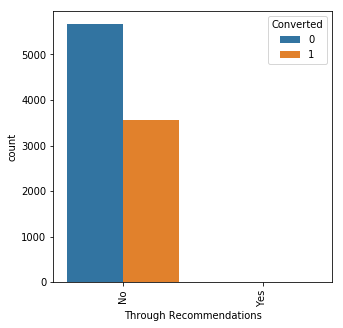

In [53]:
checkValueCount('Through Recommendations',figSize=(5,5))

#### Inferences ::  
we can drop Through Recommendations cols as there is almost single value

In [54]:
colsToBeDrop.append('Through Recommendations')

No    9240
Name: Receive More Updates About Our Courses, dtype: int64


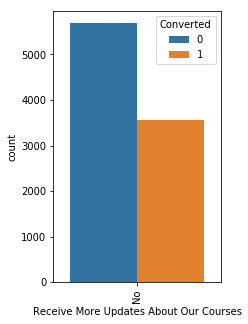

In [55]:
checkValueCount('Receive More Updates About Our Courses',figSize=(3,5))

#### Inferences :: 
we can drop Receive More Updates About Our Courses as there is only single value

In [56]:
colsToBeDrop.append('Receive More Updates About Our Courses')

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

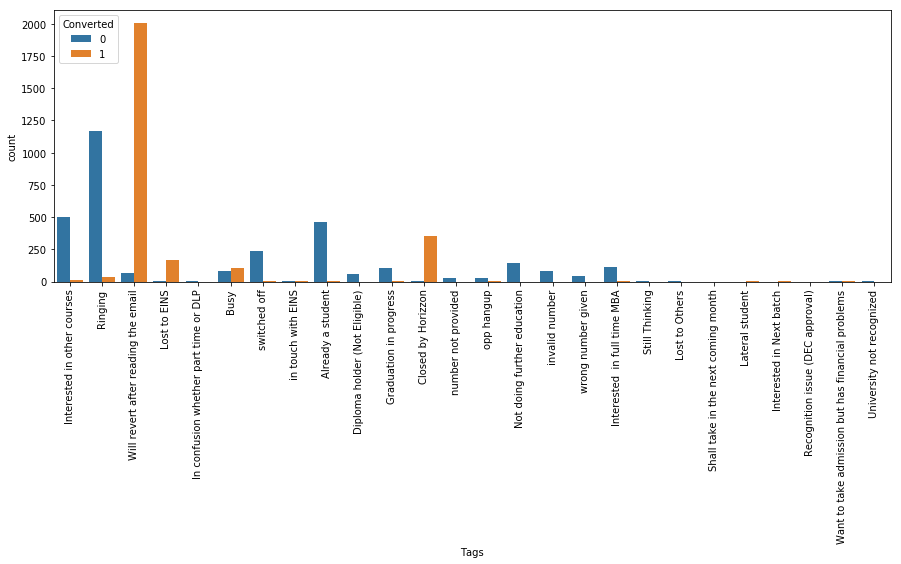

In [57]:
checkValueCount('Tags',figSize=(15,5))

#### Inferences :: 
Need null value treatment

Not Specified                                        3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

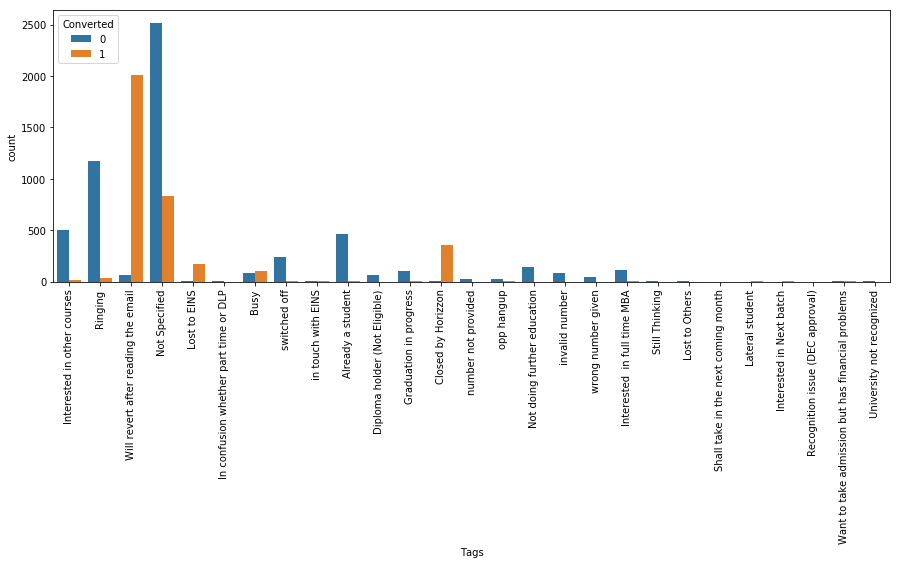

In [58]:
## let's impute null values with 'Not Specified'.
data['Tags'] = data['Tags'].replace(np.nan, 'Not Specified')
checkValueCount('Tags',figSize=(15,5))

In [59]:
#replacing tags with low frequency with "Other Tags"
data['Tags'] = data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

data['Tags'] = data['Tags'].replace(['switched off',
                                      'Already a student',
                                       'Not doing further education',
                                       'invalid number',
                                       'wrong number given',
                                       'Interested  in full time MBA'] , 'Other_Tags')

NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


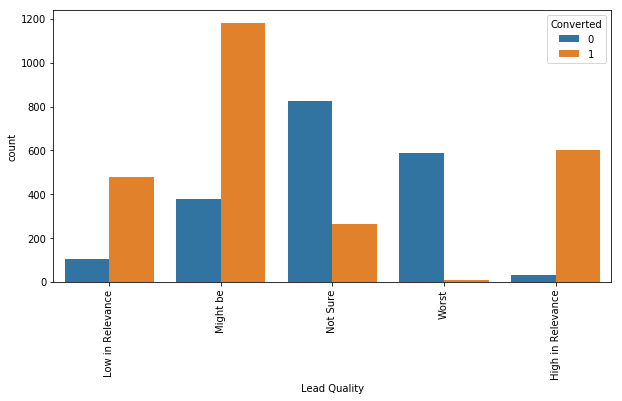

In [60]:
checkValueCount('Lead Quality',figSize=(10,5))

#### Observation :: 
Null value treatment

Not Sure             5859
Might be             1560
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64


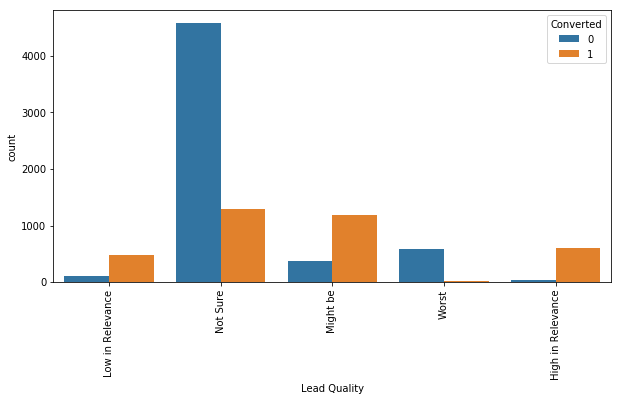

In [61]:
# As Lead quality is based on the intution of employee, so we can impute 'Not Sure' in NaN safely.
data['Lead Quality'] = data['Lead Quality'].replace(np.nan, 'Not Sure')
checkValueCount('Lead Quality',figSize=(10,5))

No    9240
Name: Update me on Supply Chain Content, dtype: int64


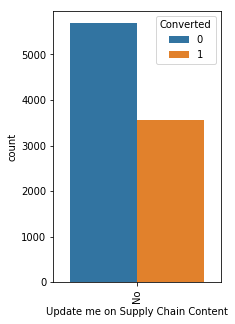

In [62]:
checkValueCount('Update me on Supply Chain Content',figSize=(3,5))

#### Inferences :: 
we can drop col Update me on Supply Chain Content as there is only single value

In [63]:
colsToBeDrop.append('Update me on Supply Chain Content')

No    9240
Name: Get updates on DM Content, dtype: int64


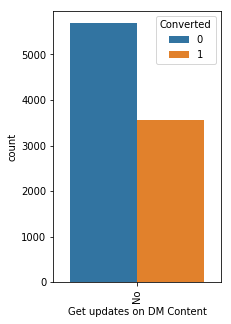

In [64]:
checkValueCount('Get updates on DM Content',figSize=(3,5))

#### Inferences :: 
We can drop col Get updates on DM Content as there is only single value

In [65]:
colsToBeDrop.append('Get updates on DM Content')

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64


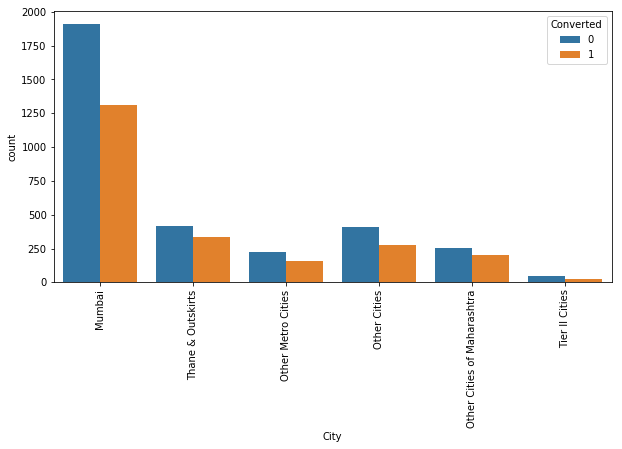

In [66]:
checkValueCount('City',figSize=(10,5))

#### Inferences :: 
 - As there is 39% null values for city and being an online education plateform city barely impact on leads. So let's remove this city cols.

In [67]:
colsToBeDrop.append('City')

NaN          4218
02.Medium    3839
01.High       821
03.Low        362
Name: Asymmetrique Activity Index, dtype: int64


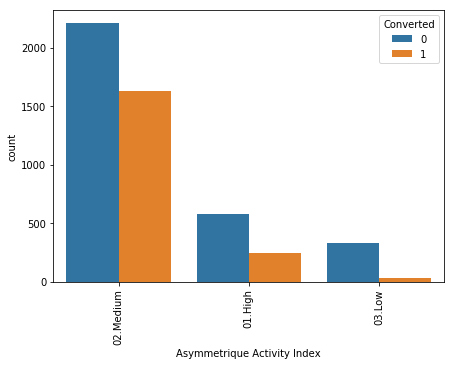

In [68]:
checkValueCount('Asymmetrique Activity Index',figSize=(7,5))

NaN          4218
02.Medium    2788
01.High      2203
03.Low         31
Name: Asymmetrique Profile Index, dtype: int64


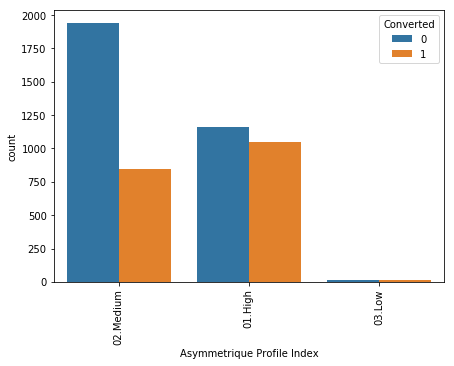

In [69]:
#Asymmetrique Profile Index  
checkValueCount('Asymmetrique Profile Index',figSize=(7,5))

#### Inferences :: 

Below coloumns contains 45% null values so let's drop these cols

 - Asymmetrique Activity Index                      45.65
 - Asymmetrique Profile Index                       45.65
 - Asymmetrique Activity Score                      45.65
 - Asymmetrique Profile Score                       45.65

In [70]:
colsToBeDrop.extend(['Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'])

No    9240
Name: I agree to pay the amount through cheque, dtype: int64


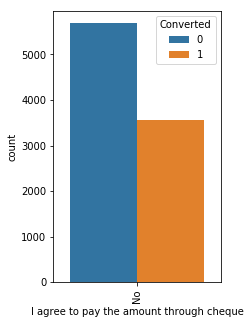

In [71]:
checkValueCount('I agree to pay the amount through cheque',figSize=(3,5))

#### Inferences :: 
We can remove above col as there is only single entry

In [72]:
colsToBeDrop.append('I agree to pay the amount through cheque')

No     6352
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64


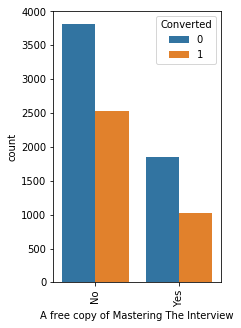

In [73]:
#A free copy of Mastering The Interview
checkValueCount('A free copy of Mastering The Interview',figSize=(3,5))

Modified                        3407
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Form Submitted on Website          1
Resubscribed to emails             1
Email Received                     1
Approached upfront                 1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64


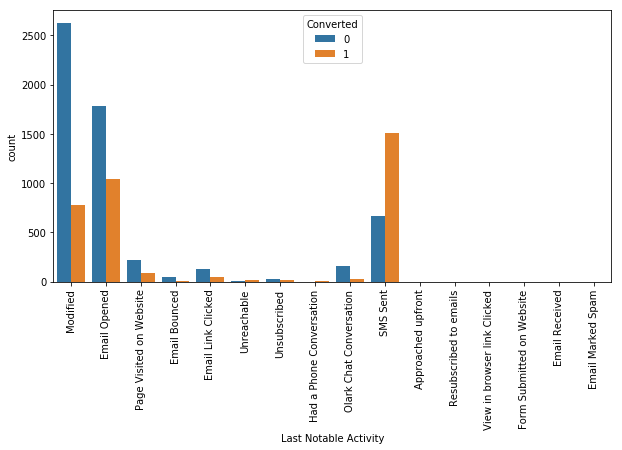

In [74]:
# Last Notable Activity
checkValueCount('Last Notable Activity',figSize=(10,5))

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64


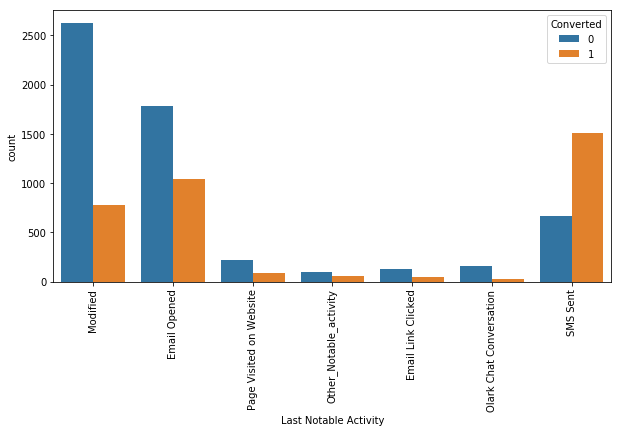

In [75]:
#Let's club lower frequency values for better analysis

data['Last Notable Activity'] = data['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')
# Last Notable Activity
checkValueCount('Last Notable Activity',figSize=(10,5))

In [76]:
colsToBeDrop

['Do Not Call',
 'Country',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque']

In [77]:
# drop cols 
data.head()

Lead Origin     Lead Source Do Not Email Do Not Call  \
0                      API      Olark Chat           No          No   
1                      API  Organic Search           No          No   
2  Landing Page Submission  Direct Traffic           No          No   
3  Landing Page Submission  Direct Traffic           No          No   
4  Landing Page Submission          Google           No          No   

   Converted  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0          0.0                            0                   0.0   
1          0          5.0                          674                   2.5   
2          1          2.0                         1532                   2.0   
3          0          1.0                          305                   1.0   
4          1          2.0                         1428                   1.0   

             Last Activity Country           Specialization  \
0  Page Visited on Website     NaN            Not Specified   
1             Email Opened   India            Not Specified   
2             Email Opened   India  Business Administration   
3                   Others   India    Media and Advertising   
4        Converted to Lead   India            Not Specified   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course Search Magazine  \
0                       Better Career Prospects     No       No   
1                       Better Career Prospects     No       No   
2                       Better Career Prospects     No       No   
3                       Better Career Prospects     No       No   
4                       Better Career Prospects     No       No   

  Newspaper Article X Education Forums Newspaper Digital Advertisement  \
0                No                 No        No                    No   
1                No                 No        No                    No   
2                No                 No        No                    No   
3                No                 No        No                    No   
4                No                 No        No                    No   

  Through Recommendations Receive More Updates About Our Courses  \
0                      No                                     No   
1                      No                                     No   
2                      No                                     No   
3                      No                                     No   
4                      No                                     No   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  Update me on Supply Chain Content Get updates on DM Content    City  \
0                                No                        No     NaN   
1                                No                        No     NaN   
2                                No                        No  Mumbai   
3                                No                        No  Mumbai   
4                                No                        No  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

   Asymmetrique Activity Score  Asymmetrique Profile Score  \
0                        

In [78]:
data.drop(colsToBeDrop,1,inplace = True)

In [79]:
data.head()

Lead Origin     Lead Source Do Not Email  Converted  \
0                      API      Olark Chat           No          0   
1                      API  Organic Search           No          0   
2  Landing Page Submission  Direct Traffic           No          1   
3  Landing Page Submission  Direct Traffic           No          0   
4  Landing Page Submission          Google           No          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website            Not Specified   
1             Email Opened            Not Specified   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead            Not Specified   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified

In [80]:
data.shape

(9240, 15)

So here we have 14 columns now

In [81]:
#Check the Null Values in All Columns:
round(100*(data.isnull().sum()/len(data.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Tags                                             0.00
Lead Quality                                     0.00
A free copy of Mastering The Interview           0.00
Last Notable Activity                            0.00
dtype: float64

In [82]:
#Let's Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
data = data.dropna()

### 4.Numerical Attributes Analysis:

In [83]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(data['Converted'])/len(data['Converted'].index))*100
Converted

38.02043282434362

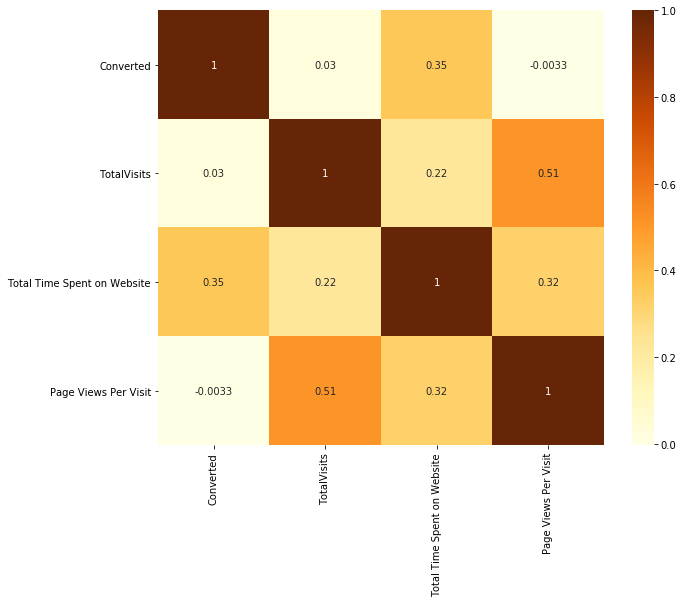

In [84]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(data.corr(), cmap='YlOrBr', annot=True)
plt.show()

### 5. Outlier Analysis
##### Before doing the model building, let us do the outlier analysis and proceed further.

In [85]:
#REMOVE OUTLIERS
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    value = q3 - q1
    lower_value = q1-1.5*value
    higher_value = q3 + 1.5*value
    out = df[(df[col]<higher_value) & (df[col]>lower_value)]
    return out

In [86]:
#Total Visits
#visualizing spread of variable
def showBoxPlot(data,col):
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.show()
    print(data[col].describe(percentiles=[0.05,.25, .5, .75, .90, .95]))

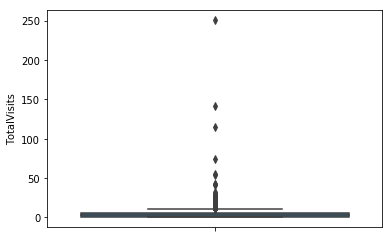

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
max       251.000000
Name: TotalVisits, dtype: float64


In [87]:
showBoxPlot(data,'TotalVisits')


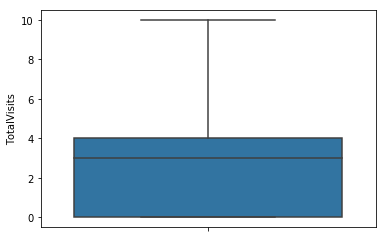

count    8750.000000
mean        2.906857
std         2.469730
min         0.000000
5%          0.000000
25%         0.000000
50%         3.000000
75%         4.000000
90%         6.000000
95%         8.000000
max        10.000000
Name: TotalVisits, dtype: float64


In [88]:
# As per above box plots we can see outlier are presents for TotalVisits so let's do outlier treatments
data = remove_outliers(data,'TotalVisits')
showBoxPlot(data,'TotalVisits')

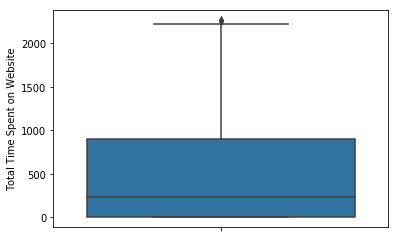

count    8750.000000
mean      471.579771
std       542.047642
min         0.000000
5%          0.000000
25%         0.000000
50%       234.000000
75%       895.750000
90%      1364.200000
95%      1549.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64


In [89]:
#Total Time Spent on Website
showBoxPlot(data,'Total Time Spent on Website')

In [90]:
# There is no such major outliers so let's keep it as it is.

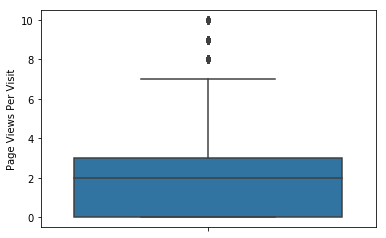

count    8750.000000
mean        2.248421
std         1.923434
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64


In [91]:
#Page Views Per Visit

showBoxPlot(data,'Page Views Per Visit')

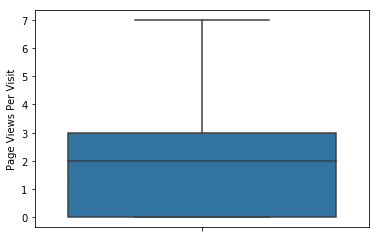

count    8599.000000
mean        2.136839
std         1.741685
min         0.000000
5%          0.000000
25%         0.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         5.000000
max         7.000000
Name: Page Views Per Visit, dtype: float64


In [92]:
data = remove_outliers(data,'Page Views Per Visit')
showBoxPlot(data,'Page Views Per Visit')

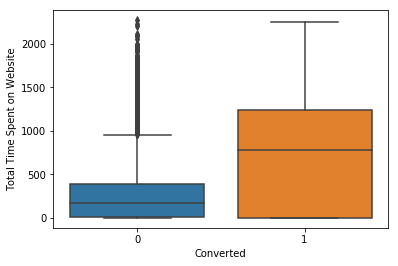

In [93]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=data.Converted, y=data['Total Time Spent on Website'])

 #### Inference  :: 
 
  - Person who spends more time on websites are more likely to be converted. So a focus on website engagment is key factor for leads conversion. 

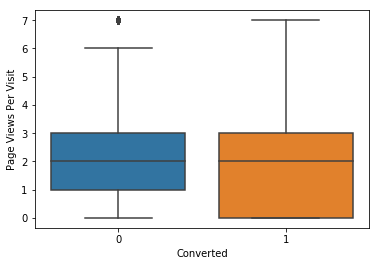

In [94]:
#checking Spread of "Page Views Per Visit" vs Converted variable
sns.boxplot(x=data.Converted,y=data['Page Views Per Visit'])

#### Inference :: 
 - Median for converted and unconverted leads are same.

In [95]:
#checking missing values in leftover columns/

round(100*(data.isnull().sum()/len(data.index)),2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Tags                                             0.0
Lead Quality                                     0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

### 7. Dummy Variable creation

In [96]:
#all categorical columns

cat_cols= data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [97]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [98]:
data.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website            Not Specified   
1             Email Opened            Not Specified   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead            Not Specified   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   A free copy of Mastering The Interview Last Notable Activity  
0                                       0              Modified  
1                                       0          Email Opened  
2                                       1          Email Opened  
3                                       0              Modified  
4                                       0              Modified

In [99]:
#all categorical columns

cat_cols= data.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Quality',
       'Last Notable Activity'],
      dtype='object')

In [100]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(data[['Lead Origin','What is your current occupation']], drop_first=True)

data = pd.concat([data,dummy],1)

In [101]:
data.head()

Lead Origin     Lead Source  Do Not Email  Converted  \
0                      API      Olark Chat             0          0   
1                      API  Organic Search             0          0   
2  Landing Page Submission  Direct Traffic             0          1   
3  Landing Page Submission  Direct Traffic             0          0   
4  Landing Page Submission          Google             0          1   

   TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0          0.0                            0                   0.0   
1          5.0                          674                   2.5   
2          2.0                         1532                   2.0   
3          1.0                          305                   1.0   
4          2.0                         1428                   1.0   

             Last Activity           Specialization  \
0  Page Visited on Website            Not Specified   
1             Email Opened            Not Specified   
2             Email Opened  Business Administration   
3                   Others    Media and Advertising   
4        Converted to Lead            Not Specified   

  What is your current occupation  \
0                      Unemployed   
1                      Unemployed   
2                         Student   
3                      Unemployed   
4                      Unemployed   

  What matters most to you in choosing a course  \
0                       Better Career Prospects   
1                       Better Career Prospects   
2                       Better Career Prospects   
3                       Better Career Prospects   
4                       Better Career Prospects   

                                  Tags      Lead Quality  \
0          Interested in other courses  Low in Relevance   
1                              Ringing          Not Sure   
2  Will revert after reading the email          Might be   
3                              Ringing          Not Sure   
4  Will revert after reading the email          Might be   

   A free copy of Mastering The Interview Last Notable Activity  \
0                                       0              Modified   
1                                       0          Email Opened   
2                                       1          Email Opened   
3                                       0              Modified   
4                                       0              Modified   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  What is your current occupation_Housewife  \
0                        0                                          0   
1                        0                                          0   
2                        0                                          0   
3                        0                                          0   
4                        0                                          0   

   What is your current occupation_Other  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2    

In [102]:
dummy = pd.get_dummies(data['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [103]:
dummy = pd.get_dummies(data['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [104]:
dummy = pd.get_dummies(data['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
data = pd.concat([data, dummy], axis = 1)

In [105]:
dummy = pd.get_dummies(data['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
data = pd.concat([data, dummy], axis = 1)

In [106]:
dummy = pd.get_dummies(data['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
data = pd.concat([data, dummy], axis = 1)

In [107]:
#dropping the original columns after dummy variable creation

data.drop(cat_cols,1,inplace = True)

In [108]:
data.head()

Do Not Email  Converted  TotalVisits  Total Time Spent on Website  \
0             0          0          0.0                            0   
1             0          0          5.0                          674   
2             0          1          2.0                         1532   
3             0          0          1.0                          305   
4             0          1          2.0                         1428   

   Page Views Per Visit  A free copy of Mastering The Interview  \
0                   0.0                                       0   
1                   2.5                                       0   
2                   2.0                                       1   
3                   1.0                                       0   
4                   1.0                                       0   

   Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
0                                    0                          0   
1                                    0                          0   
2                                    1                          0   
3                                    1                          0   
4                                    1                          0   

   Lead Origin_Lead Import  What is your current occupation_Housewife  \
0                        0                                          0   
1                        0                                          0   
2                        0                                          0   
3                        0                                          0   
4                        0                                          0   

   What is your current occupation_Other  \
0                                      0   
1                                      0   
2                                      0   
3                                      0   
4                                      0   

   What is your current occupation_Student  \
0                                        0   
1                                        0   
2                                        1   
3                                        0   
4                                        0   

   What is your current occupation_Unemployed  \
0                                           1   
1                                           1   
2                                           0   
3                                           1   
4                                           1   

   What is your current occupation_Working Professional  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Specialization_Banking, Investment And Insurance  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   

   Specialization_Business Administration  Specialization_E-Business  \
0                                       0                          0   
1                                       0                          0   
2                                       1                          0   
3                                       0                          0   
4                                       0                          0   

   Specialization_E-COMMERCE  Specialization_International Business  \
0                          0                                      0   
1                          0                                      0   
2                          0                                      0   
3                          0                                      0   
4 

### 8. Model Building 

#### Split Train-Test data

In [109]:
# Putting target variable (converted) to y
y = data['Converted']

y.head()

X=data.drop('Converted', axis=1)

In [110]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 4248 to 6072
Data columns (total 53 columns):
Do Not Email                                            6019 non-null int64
TotalVisits                                             6019 non-null float64
Total Time Spent on Website                             6019 non-null int64
Page Views Per Visit                                    6019 non-null float64
A free copy of Mastering The Interview                  6019 non-null int64
Lead Origin_Landing Page Submission                     6019 non-null uint8
Lead Origin_Lead Add Form                               6019 non-null uint8
Lead Origin_Lead Import                                 6019 non-null uint8
What is your current occupation_Housewife               6019 non-null uint8
What is your current occupation_Other                   6019 non-null uint8
What is your current occupation_Student                 6019 non-null uint8
What is your current occupation_Unemployed        

### 9. Scaling of data

In [112]:
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include=['float64','int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()                                         

Do Not Email  TotalVisits  Total Time Spent on Website  \
4248     -0.290697     0.074012                    -0.698561   
6779     -0.290697    -0.343496                    -0.689392   
8284     -0.290697     1.326537                    -0.262092   
3863     -0.290697     2.161553                    -0.296936   
1703     -0.290697     0.074012                    -0.797592   

      Page Views Per Visit  A free copy of Mastering The Interview  \
4248             -0.366001                               -0.662250   
6779             -0.078829                               -0.662250   
8284              0.495515                               -0.662250   
3863              0.305981                                1.510003   
1703              0.495515                               -0.662250   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
4248                                    0                          0   
6779                                    0                          0   
8284                                    1                          0   
3863                                    1                          0   
1703                                    0                          0   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
4248                        0                                          0   
6779                        0                                          0   
8284                        0                                          0   
3863                        0                                          0   
1703                        0                                          0   

      What is your current occupation_Other  \
4248                                      0   
6779                                      0   
8284                                      0   
3863                                      0   
1703                                      0   

      What is your current occupation_Student  \
4248                                        0   
6779                                        0   
8284                                        0   
3863                                        0   
1703                                        0   

      What is your current occupation_Unemployed  \
4248                                           1   
6779                                           1   
8284                                           1   
3863                                           1   
1703                                           1   

      What is your current occupation_Working Professional  \
4248                                                  0      
6779                                                  0      
8284                                                  0      
3863                                                  0      
1703                                                  0      

      Specialization_Banking, Investment And Insurance  \
4248                                                 0   
6779                                                 0   
8284                                                 0   
3863                                                 0   
1703                                                 0   

      Specialization_Business Administration  Specialization_E-Business  \
4248                                       0                          0   
6779                                       0                          0   
8284                                       0                          0   
3863                                       0                          0   
1703                                       0                          0   

      Specialization_E-COMMERCE  Specialization_International Business  \
4248                          0                                      0   
6779                          0                                      0   
8284                    

In [113]:
num_cols


Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview'],
      dtype='object')

### 10. RFE 

In [114]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [115]:
rfe.support_

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
        True, False,  True, False,  True, False, False, False, False,
       False,  True, False,  True, False, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True])

In [116]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 24),
 ('TotalVisits', False, 18),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 17),
 ('A free copy of Mastering The Interview', False, 32),
 ('Lead Origin_Landing Page Submission', False, 10),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 15),
 ('What is your current occupation_Housewife', False, 29),
 ('What is your current occupation_Other', False, 31),
 ('What is your current occupation_Student', False, 34),
 ('What is your current occupation_Unemployed', False, 20),
 ('What is your current occupation_Working Professional', False, 7),
 ('Specialization_Banking, Investment And Insurance', False, 37),
 ('Specialization_Business Administration', False, 22),
 ('Specialization_E-Business', False, 35),
 ('Specialization_E-COMMERCE', False, 21),
 ('Specialization_International Business', False, 30),
 ('Specialization_Management_Specializations', False, 38),
 ('Specialization_Media and Advertising', Fals

In [117]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Organic Search', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Modified',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email'],
      dtype='object')

In [118]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Google',
       'Lead Source_Live Chat', 'Lead Source_Ol

In [119]:
# define method for model building 

def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    logm = sm.GLM(y,X, family = sm.families.Binomial())
    lm = logm.fit()# fitting the model
    print(lm.summary()) # model summary
    return X
  
# define method to check VIF value    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [120]:
X_train_rfe = X_train[col]
X_train_rfe.head()

Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
4248                          0                           0   
6779                          0                           0   
8284                          0                           0   
3863                          0                           0   
1703                          0                           0   

      Lead Source_Organic Search  Lead Source_Referral Sites  \
4248                           0                           0   
6779                           0                           0   
8284                           0                           0   
3863                           0                           0   
1703                           0                           0   

      Lead Source_Welingak Website  Last Activity_Olark Chat Conversation  \
4248                             0                                      0   
6779                             0                                      0   
8284                             0                                      0   
3863                             0                                      0   
1703                             0                                      0   

      Last Activity_SMS Sent  Last Notable Activity_Modified  \
4248                       0                               1   
6779                       0                               0   
8284                       0                               0   
3863                       0                               0   
1703                       0                               0   

      Last Notable Activity_SMS Sent  Tags_Closed by Horizzon  \
4248                               0                        0   
6779                               0                        0   
8284                               0                        0   
3863                               0                        0   
1703                               0                        0   

      Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other_Tags  \
4248                                 0                  0                0   
6779                                 0                  0                0   
8284                                 0                  0                0   
3863                                 0                  0                0   
1703                                 0                  0                0   

      Tags_Ringing  Tags_Will revert after reading the email  
4248             0                                         0  
6779             1                                         0  
8284             0                                         1  
3863             1                                         0  
1703             0                                         0

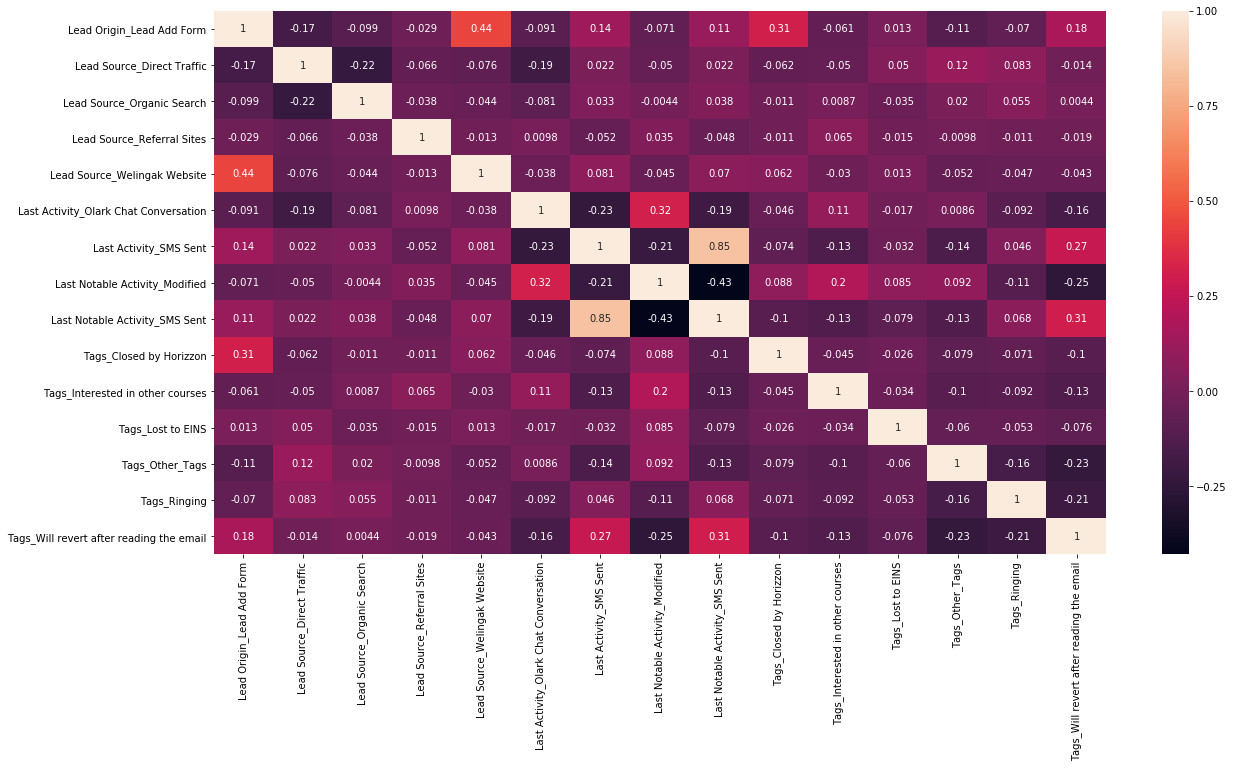

In [121]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_rfe.corr(),annot = True)

#### Model : 1

In [122]:
# Building model 1 
X_train_1 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6003
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1298.9
Date:                Sun, 17 Nov 2019   Deviance:                       2597.8
Time:                        20:24:28   Pearson chi2:                 9.81e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1569      0.087    -13.3

In [123]:
checkVIF(X_train_rfe)

Features   VIF
4               Lead Source_Welingak Website  1.31
9                    Tags_Closed by Horizzon  1.22
11                         Tags_Lost to EINS  1.05
3                 Lead Source_Referral Sites  1.02
8             Last Notable Activity_SMS Sent  0.68
0                  Lead Origin_Lead Add Form  0.67
13                              Tags_Ringing  0.40
2                 Lead Source_Organic Search  0.31
5      Last Activity_Olark Chat Conversation  0.28
10          Tags_Interested in other courses  0.27
12                           Tags_Other_Tags  0.23
7             Last Notable Activity_Modified  0.17
1                 Lead Source_Direct Traffic  0.13
6                     Last Activity_SMS Sent  0.12
14  Tags_Will revert after reading the email  0.09

##### Inference :: 
P value of Lead Source_Referral Sites is pretty high so let's drop it and build for model 2

In [124]:
#Lead Source_Organic Search
#Lead Source_Referral Sites
col = col.drop("Lead Source_Organic Search",1)


In [125]:
# Building model 2
X_train_2 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6004
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1299.1
Date:                Sun, 17 Nov 2019   Deviance:                       2598.1
Time:                        20:24:28   Pearson chi2:                 9.93e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1682      0.084    -13.9

In [126]:
checkVIF(X_train[col])

Features   VIF
3               Lead Source_Welingak Website  1.31
8                    Tags_Closed by Horizzon  1.22
10                         Tags_Lost to EINS  1.05
2                 Lead Source_Referral Sites  1.02
7             Last Notable Activity_SMS Sent  0.68
0                  Lead Origin_Lead Add Form  0.66
12                              Tags_Ringing  0.39
4      Last Activity_Olark Chat Conversation  0.28
9           Tags_Interested in other courses  0.27
11                           Tags_Other_Tags  0.22
6             Last Notable Activity_Modified  0.17
1                 Lead Source_Direct Traffic  0.12
5                     Last Activity_SMS Sent  0.12
13  Tags_Will revert after reading the email  0.08

In [127]:
# Due to high p Value let's drop 

col = col.drop("Lead Source_Referral Sites",1)
# Building model 3
X_train_3 = build_model(X_train[col],y_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6019
Model:                            GLM   Df Residuals:                     6005
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1299.2
Date:                Sun, 17 Nov 2019   Deviance:                       2598.4
Time:                        20:24:28   Pearson chi2:                 9.94e+03
No. Iterations:                     8   Covariance Type:             nonrobust
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -1.1734      0.083    -14.0

In [128]:
checkVIF(X_train[col])

Features   VIF
2               Lead Source_Welingak Website  1.31
7                    Tags_Closed by Horizzon  1.22
9                          Tags_Lost to EINS  1.05
6             Last Notable Activity_SMS Sent  0.68
0                  Lead Origin_Lead Add Form  0.66
11                              Tags_Ringing  0.39
3      Last Activity_Olark Chat Conversation  0.28
8           Tags_Interested in other courses  0.26
10                           Tags_Other_Tags  0.22
5             Last Notable Activity_Modified  0.17
1                 Lead Source_Direct Traffic  0.12
4                     Last Activity_SMS Sent  0.12
12  Tags_Will revert after reading the email  0.08

### 11. Residual analysis for model

In [129]:
X_train_new = X_train_3;

logm = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
lm = logm.fit()# fitting the model

y_train_pred = lm.predict(X_train_new)

In [130]:
y_train_pred[:10]

4248    0.080887
6779    0.009096
8284    0.970175
3863    0.009096
1703    0.236241
7750    0.996547
1508    0.236241
4597    0.965698
1819    0.996547
8705    0.013686
dtype: float64

In [131]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.0808866 , 0.00909562, 0.9701746 , 0.00909562, 0.23624063,
       0.99654709, 0.23624063, 0.96569769, 0.99654709, 0.01368602])

In [132]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID
0          0        0.080887         4248
1          0        0.009096         6779
2          1        0.970175         8284
3          0        0.009096         3863
4          0        0.236241         1703

In [133]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted
0          0        0.080887         4248          0
1          0        0.009096         6779          0
2          1        0.970175         8284          1
3          0        0.009096         3863          0
4          0        0.236241         1703          0

In [134]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3578  149]
 [ 301 1991]]


In [135]:
# check overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9252367502907459


In [136]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [137]:
# Sensitivity

# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.868673647469459

In [138]:
# Specificity
TN / float(TN+FP)

0.9600214649852428

In [139]:
# False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.03997853501475718


In [140]:
# positive predictive value 
print (TP / float(TP+FP))

0.930373831775701


In [141]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9224026811033772


### 12. ROC Curve

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [143]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

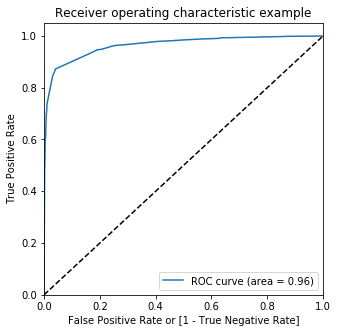

In [144]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [191]:
#ROC_AUC Score
"{:2.2f}".format(metrics.roc_auc_score(y_train_pred_final.Converted, y_train_pred_final.Converted_prob))

'0.96'

#### Observation :: 
- Value 0.96 is close to 1 so we can consider it good predictive model

### 13. Optimal Cutoff point


In [145]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.080887         4248          0    1    0    0    0    0   
1          0        0.009096         6779          0    1    0    0    0    0   
2          1        0.970175         8284          1    1    1    1    1    1   
3          0        0.009096         3863          0    1    0    0    0    0   
4          0        0.236241         1703          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  
0    0    0    0    0    0  
1    0    0    0    0    0  
2    1    1    1    1    1  
3    0    0    0    0    0  
4    0    0    0    0    0

In [146]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.380794  1.000000  0.000000
0.1   0.1  0.814421  0.965096  0.721760
0.2   0.2  0.859777  0.946771  0.806279
0.3   0.3  0.926400  0.872164  0.959753
0.4   0.4  0.925901  0.870855  0.959753
0.5   0.5  0.925237  0.868674  0.960021
0.6   0.6  0.925237  0.868674  0.960021
0.7   0.7  0.921582  0.843368  0.969681
0.8   0.8  0.893504  0.737347  0.989536
0.9   0.9  0.887024  0.719459  0.990072


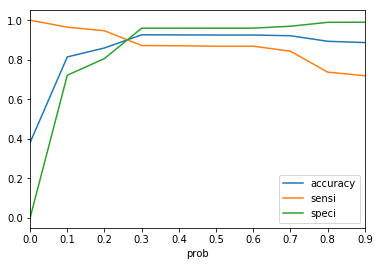

In [147]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [148]:
#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

Converted  Converted_prob  Prospect ID  Predicted  0.0  0.1  0.2  0.3  0.4  \
0          0        0.080887         4248          0    1    0    0    0    0   
1          0        0.009096         6779          0    1    0    0    0    0   
2          1        0.970175         8284          1    1    1    1    1    1   
3          0        0.009096         3863          0    1    0    0    0    0   
4          0        0.236241         1703          0    1    1    1    0    0   

   0.5  0.6  0.7  0.8  0.9  final_Predicted  
0    0    0    0    0    0                0  
1    0    0    0    0    0                0  
2    1    1    1    1    1                1  
3    0    0    0    0    0                0  
4    0    0    0    0    0                0

In [149]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

Converted  Converted_prob  Prospect ID  final_Predicted  Lead_Score
0          0        0.080887         4248                0           8
1          0        0.009096         6779                0           1
2          1        0.970175         8284                1          97
3          0        0.009096         3863                0           1
4          0        0.236241         1703                0          24

In [150]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.9263997341751121

In [151]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3577,  150],
       [ 293, 1999]])

In [152]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [153]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8721640488656196

In [154]:
# Let us calculate specificity
TN / float(TN+FP)

0.9597531526697075

### Inference :: 

 - Here we can see the model seems to be performing well. 

 - The ROC curve has a value of 0.96, which is very good. 

 - We have the following values for the Train Data:

    - Accuracy    : 92.63%
    - Sensitivity : 87.21%
    - Specificity : 95.97%

#### Let's Calculate False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [155]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.04024684733029246


In [156]:
# Positive predictive value 
print (TP / float(TP+FP))

0.9302000930665426


In [157]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9242894056847545


In [158]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3577,  150],
       [ 293, 1999]])

In [159]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.9302000930665426

In [160]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8721640488656196

In [161]:
# Precession Score score
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.9302000930665426

In [162]:
# Recall score
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8721640488656196

In [163]:
# Precision Recall curve
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

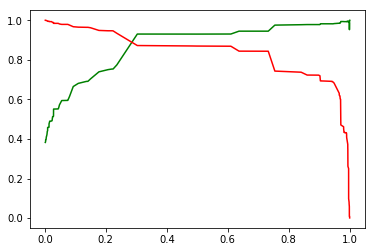

In [164]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [165]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

Do Not Email  TotalVisits  Total Time Spent on Website  \
1584      -0.29067    -0.333280                    -0.082861   
999       -0.29067     1.398567                     2.606054   
681       -0.29067     0.099682                    -0.501888   
4943      -0.29067     0.965605                     0.497764   
7485      -0.29067    -0.333280                    -0.625905   

      Page Views Per Visit  A free copy of Mastering The Interview  \
1584             -0.651805                               -0.649221   
999               2.217358                                1.540308   
681              -0.364889                               -0.649221   
4943              0.208944                               -0.649221   
7485             -0.077972                               -0.649221   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
1584                                    0                          0   
999                                     1                          0   
681                                     0                          0   
4943                                    1                          0   
7485                                    1                          0   

      Lead Origin_Lead Import  What is your current occupation_Housewife  \
1584                        0                                          0   
999                         0                                          0   
681                         0                                          0   
4943                        0                                          0   
7485                        0                                          0   

      What is your current occupation_Other  \
1584                                      0   
999                                       0   
681                                       0   
4943                                      0   
7485                                      0   

      What is your current occupation_Student  \
1584                                        0   
999                                         0   
681                                         0   
4943                                        0   
7485                                        0   

      What is your current occupation_Unemployed  \
1584                                           1   
999                                            1   
681                                            1   
4943                                           1   
7485                                           1   

      What is your current occupation_Working Professional  \
1584                                                  0      
999                                                   0      
681                                                   0      
4943                                                  0      
7485                                                  0      

      Specialization_Banking, Investment And Insurance  \
1584                                                 0   
999                                                  0   
681                                                  0   
4943                                                 0   
7485                                                 0   

      Specialization_Business Administration  Specialization_E-Business  \
1584                                       0                          0   
999                                        0                          0   
681                                        0                          0   
4943                                       1                          0   
7485                                       0                          0   

      Specialization_E-COMMERCE  Specialization_International Business  \
1584                          0                                      0   
999                           0                                      0   
681                     

In [166]:
X_test = X_test[col]
X_test.head()

Lead Origin_Lead Add Form  Lead Source_Direct Traffic  \
1584                          0                           0   
999                           0                           0   
681                           0                           0   
4943                          0                           0   
7485                          0                           1   

      Lead Source_Welingak Website  Last Activity_Olark Chat Conversation  \
1584                             0                                      0   
999                              0                                      0   
681                              0                                      0   
4943                             0                                      0   
7485                             0                                      0   

      Last Activity_SMS Sent  Last Notable Activity_Modified  \
1584                       1                               1   
999                        0                               0   
681                        0                               0   
4943                       1                               0   
7485                       0                               0   

      Last Notable Activity_SMS Sent  Tags_Closed by Horizzon  \
1584                               0                        0   
999                                0                        0   
681                                0                        0   
4943                               1                        0   
7485                               0                        0   

      Tags_Interested in other courses  Tags_Lost to EINS  Tags_Other_Tags  \
1584                                 0                  0                0   
999                                  0                  0                0   
681                                  0                  0                0   
4943                                 0                  0                0   
7485                                 0                  0                1   

      Tags_Ringing  Tags_Will revert after reading the email  
1584             0                                         0  
999              0                                         1  
681              0                                         0  
4943             0                                         1  
7485             0                                         0

In [167]:
X_test_sm = sm.add_constant(X_test)

#### Precision on Test Set

In [168]:
y_test_pred = lm.predict(X_test_sm)

In [169]:
y_test_pred[:10]

1584    0.223834
999     0.970175
681     0.236241
4943    0.996547
7485    0.013686
2094    0.177443
7725    0.996646
8971    0.047824
4584    0.965890
6435    0.994298
dtype: float64

In [170]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [171]:
# Let's see the data of y_pred_1
y_pred_1.head()

0
1584  0.223834
999   0.970175
681   0.236241
4943  0.996547
7485  0.013686

In [172]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [173]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [174]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [175]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [176]:
y_pred_final.head()

Converted  Prospect ID         0
0          0         1584  0.223834
1          1          999  0.970175
2          0          681  0.236241
3          1         4943  0.996547
4          0         7485  0.013686

In [177]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [178]:
y_pred_final.head()

Converted  Prospect ID  Converted_prob
0          0         1584        0.223834
1          1          999        0.970175
2          0          681        0.236241
3          1         4943        0.996547
4          0         7485        0.013686

In [179]:
# Rearrange the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [180]:
# Let's see the head of y_pred_final
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score
0         1584          0        0.223834          22
1          999          1        0.970175          97
2          681          0        0.236241          24
3         4943          1        0.996547         100
4         7485          0        0.013686           1

In [181]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [182]:
y_pred_final.head()

Prospect ID  Converted  Converted_prob  Lead_Score  final_Predicted
0         1584          0        0.223834          22                0
1          999          1        0.970175          97                1
2          681          0        0.236241          24                0
3         4943          1        0.996547         100                1
4         7485          0        0.013686           1                0

In [183]:
#### Overall accuracy of model

metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.924031007751938

In [184]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1574,   62],
       [ 134,  810]])

In [185]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [186]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8580508474576272

In [187]:
# Let us calculate specificity
TN / float(TN+FP)

0.9621026894865525

In [188]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.9288990825688074

In [189]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8580508474576272

#### Inference::

After running the model on the Test Data these are the figures we obtain:

 - Accuracy : 92.40%
 - Sensitivity : 85.80%
 - Specificity : 96.21%

####  Inference :: 

Let's Compare value for Train data and test data

For Train data

 - Accuracy    : 92.63%
 - Sensitivity : 87.21%
 - Specificity : 95.97%



For Test Data


 - Accuracy : 92.40%
 - Sensitivity : 85.80%
 - Specificity : 96.21%

In [192]:
# Inspectin if the final dataframe has any null values

total = pd.DataFrame(y_pred_final.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(y_pred_final.isnull().sum()/y_pred_final.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

Total  Percentage
final_Predicted      0         0.0
Lead_Score           0         0.0
Converted_prob       0         0.0
Converted            0         0.0
Prospect ID          0         0.0

### 14. Feature Importance


#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [193]:
pd.options.display.float_format = '{:.2f}'.format
new_params = lm.params[1:]
new_params

Lead Origin_Lead Add Form                   1.17
Lead Source_Direct Traffic                 -0.56
Lead Source_Welingak Website                3.52
Last Activity_Olark Chat Conversation      -1.10
Last Activity_SMS Sent                      1.19
Last Notable Activity_Modified             -1.26
Last Notable Activity_SMS Sent              1.00
Tags_Closed by Horizzon                     6.33
Tags_Interested in other courses           -1.84
Tags_Lost to EINS                           6.33
Tags_Other_Tags                            -2.54
Tags_Ringing                               -3.52
Tags_Will revert after reading the email    4.66
dtype: float64

In [195]:
#### Getting a relative coeffient value for all the features with respect to the feature with the highest coefficient


feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Lead Origin_Lead Add Form                   18.42
Lead Source_Direct Traffic                  -8.85
Lead Source_Welingak Website                55.54
Last Activity_Olark Chat Conversation      -17.39
Last Activity_SMS Sent                      18.74
Last Notable Activity_Modified             -19.84
Last Notable Activity_SMS Sent              15.72
Tags_Closed by Horizzon                    100.00
Tags_Interested in other courses           -29.06
Tags_Lost to EINS                           99.91
Tags_Other_Tags                            -40.15
Tags_Ringing                               -55.53
Tags_Will revert after reading the email    73.49
dtype: float64

In [202]:
print(feature_importance)

Lead Origin_Lead Add Form                   18.42
Lead Source_Direct Traffic                  -8.85
Lead Source_Welingak Website                55.54
Last Activity_Olark Chat Conversation      -17.39
Last Activity_SMS Sent                      18.74
Last Notable Activity_Modified             -19.84
Last Notable Activity_SMS Sent              15.72
Tags_Closed by Horizzon                    100.00
Tags_Interested in other courses           -29.06
Tags_Lost to EINS                           99.91
Tags_Other_Tags                            -40.15
Tags_Ringing                               -55.53
Tags_Will revert after reading the email    73.49
dtype: float64


In [197]:
# Sort the feature variables based on coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Lead Origin_Lead Add Form                   11
Lead Source_Direct Traffic                  10
Lead Source_Welingak Website                 8
Last Activity_Olark Chat Conversation        5
Last Activity_SMS Sent                       3
Last Notable Activity_Modified               1
Last Notable Activity_SMS Sent               6
Tags_Closed by Horizzon                      0
Tags_Interested in other courses             4
Tags_Lost to EINS                            2
Tags_Other_Tags                             12
Tags_Ringing                                 9
Tags_Will revert after reading the email     7
dtype: int64

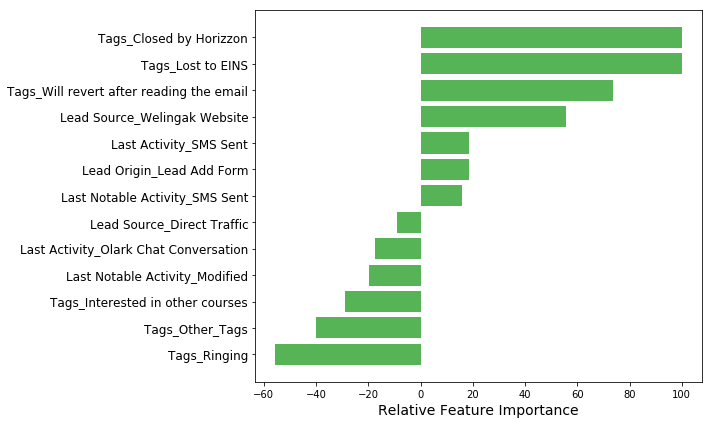

In [199]:
# draw Plot showing the feature variables based on their relative coefficient values

pos = np.arange(sorted_idx.shape[0]) + .5

feat_fig = plt.figure(figsize=(10,6))
featax = feat_fig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:green',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

#### Top 3 features which contribute most towards the probability of a lead getting converted

In [200]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

index      0
7                    Tags_Closed by Horizzon 100.00
9                          Tags_Lost to EINS  99.91
12  Tags_Will revert after reading the email  73.49

### 16. Conclusion

- All variables have p-value <0.05.
- All the features have low vif that shows there is low / less multicollinearity among the features.
- The overall accuracy of 92.40 % at a probability threshold of 0.3 on the test dataset is also good enough.

